In [4]:
import numpy as np
import visualkeras as vk
import pandas as pd
import seaborn as sn
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [5]:
train_data=np.load("C:\\Users\\Tanishka\\anaconda3\\Lib\\site-packages\\numpy\\train_data.npy")
test_data=np.load("C:\\Users\\Tanishka\\anaconda3\\Lib\\site-packages\\numpy\\test_data.npy")
train_labels=np.load("C:\\Users\\Tanishka\\anaconda3\\Lib\\site-packages\\numpy\\train_labels.npy")
test_labels=np.load("C:\\Users\\Tanishka\\anaconda3\\Lib\\site-packages\\numpy\\test_labels.npy")    

In [6]:
model = Sequential()

model.add(Conv2D(32,(5,5),input_shape=(28,28,1), activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(32,(5,5), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dense(36,activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 batch_normalization (Batch  (None, 24, 24, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 batch_normalization_1 (Bat  (None, 20, 20, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 32)        0         
 D)                                                              
                                                        

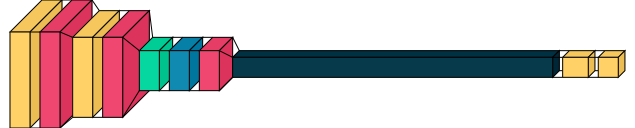

In [7]:
vk.layered_view(model)

In [8]:
best_loss_checkpoint = ModelCheckpoint(
filepath = "C:\\Users\\Tanishka\\handwriting project\\models\\best_loss_model.h5",
monitor="loss",
save_best_only=True,
save_weights_only=True,
mode="min"
)
best_val_loss_checkpoint=ModelCheckpoint(
filepath="C:\\Users\\Tanishka\\handwriting project\\models\\best_val_loss_model.h5",
monitor="val_loss",
save_best_only=True,
save_weights_only=True,
mode="min"
)

In [9]:
history = model.fit(
    train_data,
    train_labels,
    validation_data=(test_data,test_labels),
    epochs=10,
    batch_size=200,
    callbacks=[best_loss_checkpoint,best_val_loss_checkpoint]
)

Epoch 1/10
1770/1770 [==============================] - 583s 328ms/step - loss: 0.1567 - accuracy: 0.9551 - val_loss: 304.3069 - val_accuracy: 0.6023
Epoch 2/10
1770/1770 [==============================] - 580s 328ms/step - loss: 0.0694 - accuracy: 0.9791 - val_loss: 443.5994 - val_accuracy: 0.5482
Epoch 3/10
1770/1770 [==============================] - 581s 329ms/step - loss: 0.0502 - accuracy: 0.9843 - val_loss: 251.8620 - val_accuracy: 0.7574
Epoch 4/10
1770/1770 [==============================] - 580s 327ms/step - loss: 0.0397 - accuracy: 0.9872 - val_loss: 298.7888 - val_accuracy: 0.7750
Epoch 5/10
1770/1770 [==============================] - 583s 330ms/step - loss: 0.0321 - accuracy: 0.9894 - val_loss: 203.2666 - val_accuracy: 0.8096
Epoch 6/10
1770/1770 [==============================] - 585s 330ms/step - loss: 0.0270 - accuracy: 0.9912 - val_loss: 260.0068 - val_accuracy: 0.7935
Epoch 7/10
1770/1770 [==============================] - 515s 291ms/step - loss: 0.0232 - accuracy: 0

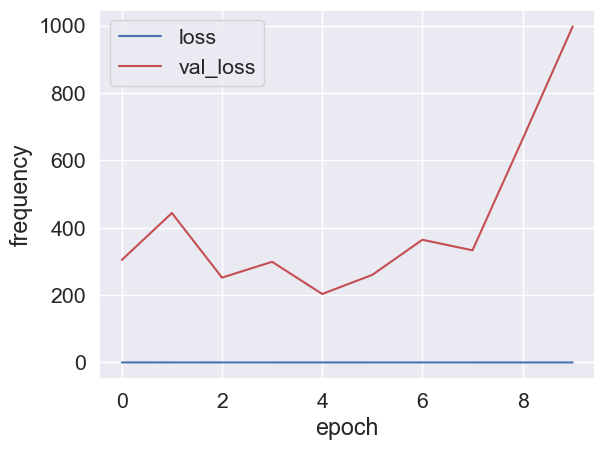

In [17]:
plt.plot(history.history["loss"],'b',label="loss")
plt.plot(history.history["val_loss"],'r',label="val_loss")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

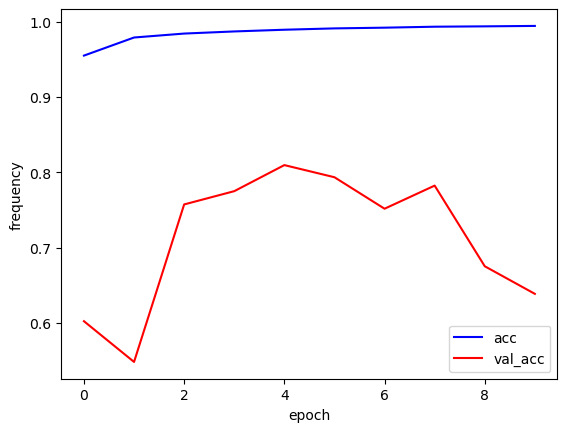

In [11]:
plt.plot(history.history["accuracy"],'b',label="acc")
plt.plot(history.history["val_accuracy"],'r',label="val_acc")
plt.xlabel("epoch")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [12]:
model.load_weights 

<bound method Model.load_weights of <keras.src.engine.sequential.Sequential object at 0x00000238E9CD5700>>

In [13]:
loss,acc=model.evaluate(test_data,test_labels)
print(loss,acc)

2766/2766 [==============================] - 53s 19ms/step - loss: 997.4222 - accuracy: 0.6386
997.4221801757812 0.6386484503746033


In [14]:
predictions=model.predict(test_data)

2766/2766 [==============================] - 38s 14ms/step


In [15]:
confusion=confusion_matrix(
    np.argmax(test_labels,axis=1),
    np.argmax(predictions,axis=1)
)
print(confusion)

[[1428   32    0 ...    0    0    0]
 [   0 1538    0 ...    0    0    0]
 [   0  242  595 ...    0    0    0]
 ...
 [   0    0    0 ... 1199    0    0]
 [   0  174    0 ...    2 1001    0]
 [  15   11    0 ...   10   87  446]]


<AxesSubplot:xlabel='predicted', ylabel='actual'>

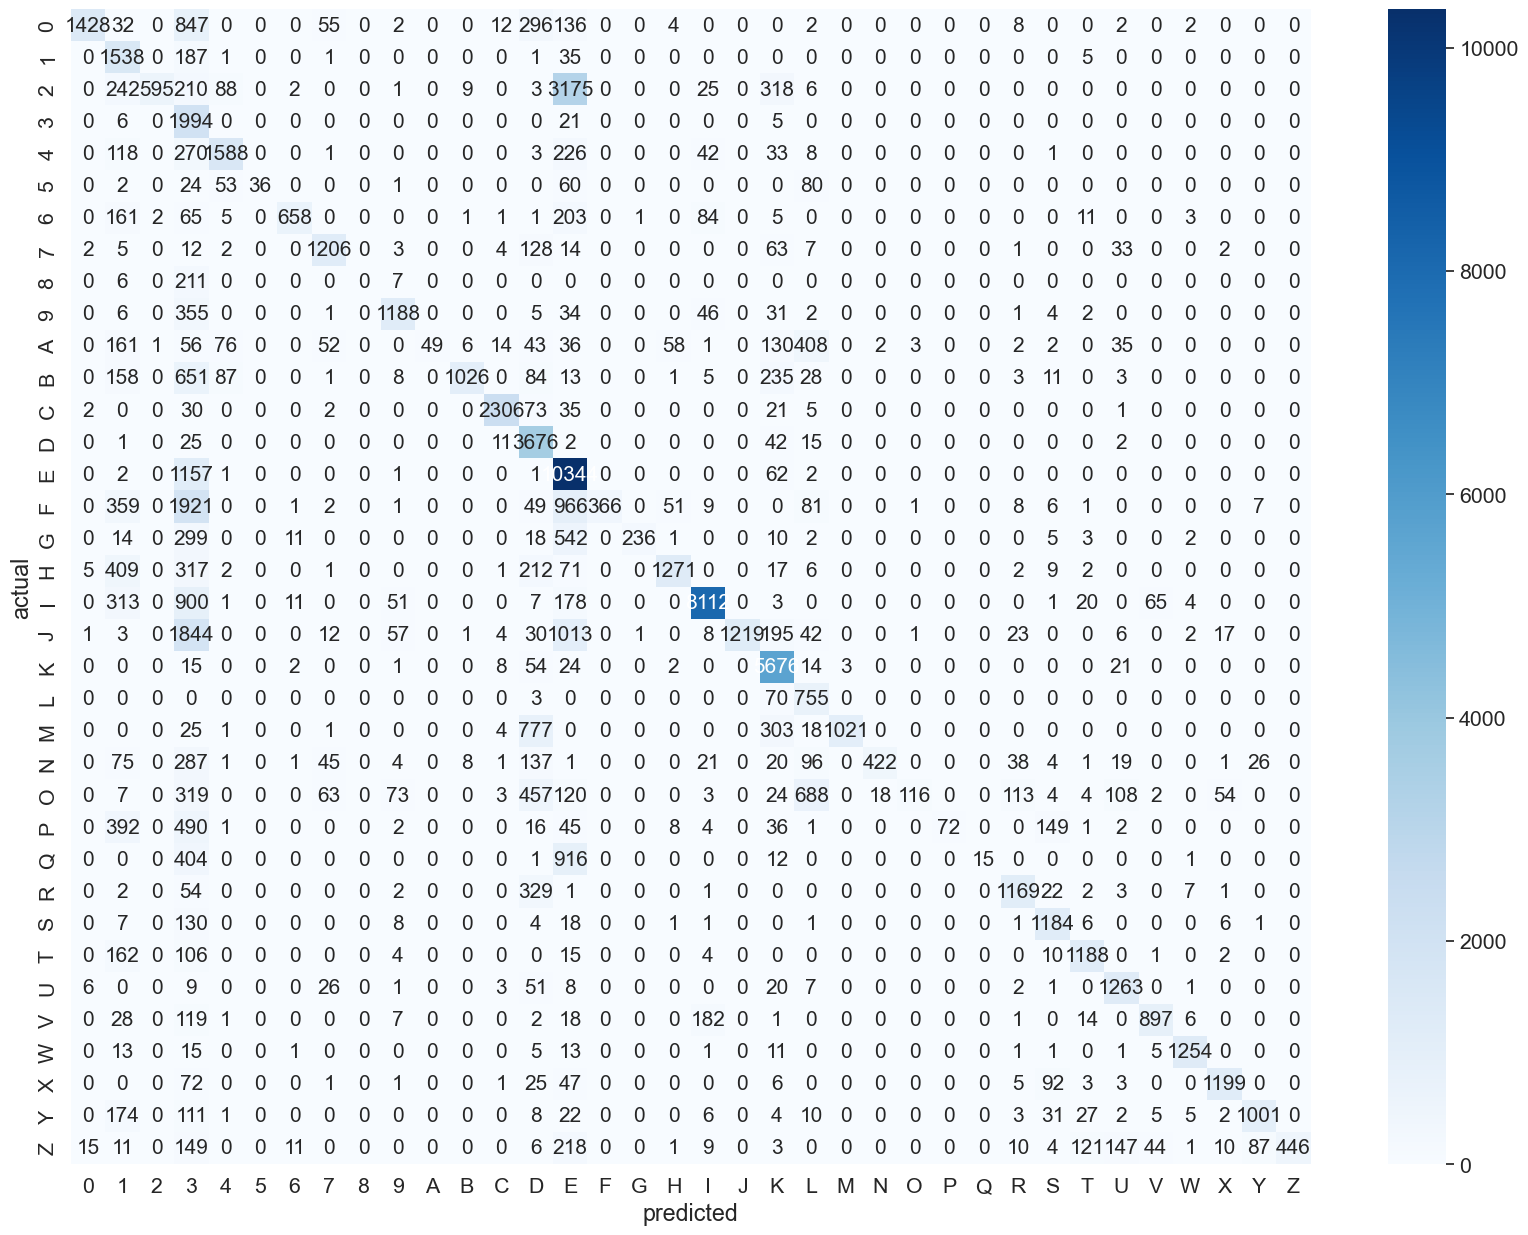

In [16]:
labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',0,1,2,3,4,5,6,7,8,9]
df_cm=pd.DataFrame(confusion,columns=np.unique(labels),index=np.unique(labels))
df_cm.index.name='actual'
df_cm.columns.name='predicted'
plt.figure(figsize=(20,15))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, cmap="Blues",annot=True,annot_kws={"size":15},fmt="d")
